## Exploration (20 points)

Like in previous assignments, in this exercise you have more lattiude and are meant to do creative exploration.  The intention is for you to teach yourself about a topic beyond what's been covered above.  Please consult the rubric below for what is expected.

#### Exploration Grading Rubric

Exploration problems will be graded according the elements in the table below.  The scores in the column headers indicate the number of points possible for each rubric element (given in the rows).  A score of zero for an element is possible if it is missing entirely.

|     | Substandard (+1) | Basic (+2) | Good (+3) | Excellent (+5) |
| :-- | :----------- | :---- | :--- | :-------- |
| <b> Pedagogical Value </b> | No clear statement of idea or concept being explored or explained; lack of motivating questions. | Simple problem with adequate motivation; still could be a useful addition to an assignment. | Good choice of problem with effective illustrations of concept(s).  Demonstrates a deeper level of understanding. | Problem also illustrates or clarifies common conceptual difficulties or misconceptions. |
| <b> Novelty of Ideas </b> | Copies existing problem or makes only a trivial modification; lack of citation(s) for source of inspiration. | Concepts are similar to those covered in the assignment but with some modifications of an existing exericse. | Ideas have clear pedagogical motivation; creates different type of problem or exercise to explore related or foundational concepts more deeply. | Applies a technique or explores concept not covered in the assignment or not discussed at length in lecture. | 
| <b> Clarity of Explanation </b> | Little or confusing explanation; figures lack labels or useful captions; no explanation of motivations. | Explanations are present, but unclear, unfocused, wordy or contain too much technical detail. | Clear and concise explanations of key ideas and motivations. | Also clear and concise, but includes illustrative figures; could be read and understood by students from a variety of backgrounds. |
| <b> Depth of Exploration </b> | Content is obvious or closely imitates assignment problems. | Uses existing problem for different data. | Applies a variation of a technique to solve a problem with an interesting motivation; explores a concept in a series of related problems. | Applies several concepts or techniques; has clear focus of inquiry that is approached from multiple directions.|

In my assignment, I performed PCA on a heart disease dataset. While the PCA worked to reduce the dimensionality, each of the principal components represented approximately 10-20% of the variance in the data. Since each PC was responsible for an approximately equal amount of data, visualizing the data did not result in a visualization that allowed me to see the different between those who had a death event due to heart disease and those who were alive. Therefore, I would like to explore another technique for dimensionality reduction which may be better due to its lack of reliance on linearity of the data. This is tSNE. tSNE, is instead an optimization problem which allows us to better separate samples into distinguishable groups.

Additionally, I use tSNE pretty consistently in the computational biology research that I am involved in. However, I just call the package, which returns the tSNE representation for me to plot. I would like to use this exploration to dive a bit more deeply in tSNE representations and implement tSNE in a more manual sense, relying lightly on packages and performing most of the computation using numpy and simple linear algebra computations.

## Sources
1. To perform this exploration, I relied on a tutorial found here: https://github.com/beaupletga/t-SNE. Although this source provided a code implementation for the tSNE algorithm, I relied on this tutorial only for the mathematical equations and created my own implementation of tSNE. 
2. I also used the original tSNE paper: https://jmlr.csail.mit.edu/papers/volume9/vandermaaten08a/vandermaaten08a.pdf for additional background.

## Background

### Conceptual Background
t-SNE (t-distributed Stochastic Neighbor Embedding) is a nonlinear dimensionality reduction technique that is widely used in machine learning and data analysis. It was introduced by Laurens van der Maaten and Geoffrey Hinton in 2008 as an improvement over previous techniques like PCA (Principal Component Analysis) and LLE (Locally Linear Embedding).

The goal of t-SNE is to take a high-dimensional dataset and represent it in a lower-dimensional space (usually 2D or 3D) while preserving as much of the original structure as possible. This makes it a useful tool for visualizing high-dimensional data and identifying patterns or clusters that may not be immediately apparent in the original dataset.

t-SNE works by first defining a probability distribution over pairs of high-dimensional points based on their similarity, using a Gaussian kernel to measure the distance between them. It then creates a similar probability distribution over pairs of points in the lower-dimensional space, using a Student's t-distribution to allow for better separation between clusters.

The algorithm then tries to minimize the difference between these two probability distributions, effectively trying to find a mapping between the high-dimensional points and the low-dimensional points that preserves their relationships. This is done using gradient descent, with a cost function that penalizes large differences between the two probability distributions.

Overall, t-SNE has become a popular tool for visualizing high-dimensional data in a way that is both intuitive and informative, and it has been used in a wide variety of applications including image recognition, text analysis, and genomics.

#### Pros
tSNE plots have several pros. They are listed below:
- tSNE is a non-linear dimensionality reduction technique. To do this, tSNE preserves the local structure of the data. This allows it to perform very well at generating clusters.
- It handles outliers very well. This means it can handle small datasets
- tSNE is very flexible, meaning it can be applied to a wide range of data, allowing scientists and individuals to study a wide range of data types and problems

#### Cons
While tSNE is a very strong algorithm, it too has its drawbacks.
- It is computationally intense. Because it is an iterative algorithm, it can become slow with large datasets
- It is non-deterministic. Because tSNE is an optimization algorithm, it can result in different results each time it is run. Therefore, setting a random seed before running the algorithm is key for reproducibility.
- Parameters must be chosen very carefully, otherwise tSNE can result in overfitting, again because it is an optimzation technique

### Mathematical Background
Each of the steps described above requires some level of mathematical interpretation. First, we must compute the similarity between two points, $x_i$ and $x_j$. To compute the similarity in the original dimensionality, we can use the formula:
$$ p_{ij} = \frac{e^{\frac{-||x_i-x_j||^2}{2\sigma^2}}}{\sum_{k\neq l}e^{\frac{-||x_i-x_j||^2}{2\sigma^2}}} $$
Then, we must compute the similarity between two points, $y_i$ and $y_j$, in the wanted dimensional space. To do so, we can use following formula:
$$ q_{ij} = \frac{(1+||y_i-y_j||^2)^{-1}}{\sum_{k\neq l}(1+||y_k-y_l||^2)^{-1}} $$
Then, we can compute the formula the error between the two distributions by using Kl-divergence:
$$ C = KL(P||Q) = \sum_i \sum_j p_{ij} log \frac{p_{ij}}{q_{ij}} $$
Since tSNE representations are an optimization problem. We can use gradient descent to update the parameters for the tSNE representation. To do this, we can take the derivative of the above formula with respect to $y_i$.
$$ \frac{\delta C}{\delta y_i} = 4\sum_j (p_{ij}-q_{ij})(y_i-y_j)(1+||y_i-y_j||^2)^{-1} $$

## tSNE from scratch
In order to implement tSNE, I created a class below which implements the necessary methods. In each method, I include in-depth comments which explain what the method is doing. See below:

In [1]:
import numpy as np # used for tSNE implementation
from matplotlib import pyplot as plt # used for plotting (not tSNE implementation itself)
import pandas as pd # used for importing and transforming data (not tSNE implementation itself) 

In [2]:
class manual_tSNE:
    def __init__(self, perplexity:int=5, kernel:int=1, epochs:int=100, learning_rate:float=0.01, momentum:float=0.99, tolerance:float=0.01):
        self.perplexity = perplexity
        self.kernel = kernel
        self.epochs = epochs
        self.lr = learning_rate
        self.momentum = momentum
        self.tolerance = tolerance
        
    def k_neighbors(self, x:np.ndarray, current_i:int, porq:str="p"):
        """
        computes the distance between the neighbors of x1 and 
        returns a list of the k neighbors where k is the complexity
        """
        
        def getKey(item):
            """
            helper method to get the distance to sort by
            """
            return item[1]
        
        # compute the distance if i doesn't point to the current point
        neighbors = []
        for i in range(x.shape[0]):
            if i != current_i:
                dist = np.exp(-np.linalg.norm(x[current_i]-x[i])**2 / (2*self.kernel**2)) if porq == "p" else (1+np.linalg.norm(x[current_i]-x[i])**2)**-1
                neighbors.append([i, dist])
                
        # sort the list by distance
        neighbors = sorted(neighbors, key=getKey)
        return neighbors[:self.perplexity]
    
    def p_ij(self, x:np.ndarray, x1_i:int, x2_i:int):
        """
        computes the similarity pij between xi and xj in the original dimensions
        """
        
        # calculate numerator and denominator for p_ij
        num = np.exp(-np.linalg.norm(x[x1_i]-x[x2_i])**2)/(2*self.kernel**2)
        denom = 0
        for neighbor in self.k_neighbors(x, x1_i, "p"):
            denom += neighbor[1]
            
        # divide and return
        return num/denom
    
    def compute_p(self, x:np.ndarray):
        """
        compute the table of p_ij for all x_i, x_j
        """
        
        # generate the table to store all p_ij
        table = np.zeros((x.shape[0], x.shape[0]))
        
        # fill in the table for all combinations of i and j
        for i in range(x.shape[0]):
            for j in range(x.shape[0]):
                if i != j:
                    # compute the values
                    p_ij = self.p_ij(x, i, j)
                    p_ji = self.p_ij(x, j, i)
                    
                    # add them to the table
                    table[i,j] = (p_ij+p_ji) / (2*x.shape[0])
        
        return table
    
    def q_ij(self, y:np.ndarray, y1_i:int, y2_i:int):
        """
        compute the similarity q_ij between yi and yj in the new dimensional space
        """
        
        # calculate numerator and denominator
        num = (1+np.linalg.norm(y[y1_i]-y[y2_i])**2)**(-1)
        denom = 0
        for i in self.k_neighbors(y, y1_i, "q"):
            denom += i[1]
            
        # divide and return
        return num/denom
    
    def compute_q(self, y:np.ndarray):
        """
        compute the table of q_ij for all y_i, y_j
        """
        
        # create the table to store values
        table = np.zeros((y.shape[0], y.shape[0]))
        
        # fill in table for all combos of i, j
        for i in range(y.shape[0]):
            for j in range(y.shape[0]):
                if i != j:
                    # compute the value and add to the table
                    table[i,j] = self.q_ij(y, i, j)
                    
        return table
    
    def kl_divergence(self, p:np.ndarray, q:np.ndarray):
        """
        compute the errors between the p and q distributions using KL divergence
        """
        
        # iterate over p and q and compute
        error = 0
        for i in range(p.shape[0]):
            for j in range(q.shape[0]):
                if q[i,j] != 0 and p[i,j] != 0:
                    error += p[i,j] * np.log(p[i,j]/q[i,j])
                    
        return error
    
    def gradient_descent(self, p:np.ndarray, q:np.ndarray, y:np.ndarray):
        """
        apply gradient descent to lower the KL divergence (more momentum = more speed)
        """
        
        # keep a history of the past values
        cache = np.zeros((p.shape[0], 2, y.shape[1]))
        error_cache = [0]
        
        # iterate for each epoch
        for e in range(self.epochs):
            for i in range(y.shape[0]):
                sum = 0
                for j in range(y.shape[0]):
                    sum += (y[i]-y[j]) * (p[i,j]-q[i,j]) * (1+np.linalg.norm(y[i]-y[j]**2))**-1
                    
                # adjust y based on learning rate and momentum
                y[i] -= 4 * self.lr * sum + self.momentum * (cache[i,1]-cache[i,0])
                
                cache[i,0] = cache[i,1]
                cache[i,1] = y[i]
            
            # compute error
            error_cache.append(self.kl_divergence(p, q))
            if abs(error_cache[-1] - error_cache[-2]) < self.tolerance:
                break
                
            # compute every 100 iterations
            if e % 100 == 0:
                q = self.compute_q(y)
                
                # notify the user
                print(error_cache[-1])
                
        # standaridize y and return 
        y -= np.mean(y)
        y /= np.std(y)
        return y
    

Now that the code is written, I can try it out. Below, I implement my algorithm on the same heart disease dataset that I used to implement PCA. Then, I compare my algorithm to the PCA algorithm I wrote for A4 as well as scikitlearn's tSNE implementation.

## manual, PCA, and scikit-learn
Below, I use my algorithm to generate a tSNE representation of the heart disease data, as well as scikit-learn's built in PCA and tSNE algorithms. In doing so, I hope to see that my implementation produces something similar to scikit-learn's tSNE representation. 

### Data pre-processing

In [3]:
# read in the data
df = pd.read_csv("data.csv")
df = df.filter(items=["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time", "DEATH_EVENT"])
data = df.iloc[:,:].values # includes the outcome (death_event, will not include this)
to_reduce = df.iloc[:,:7].values

### Using my tSNE algorithm

In [ ]:
# run manual implementation of tSNE
manual = manual_tSNE(perplexity=5, kernel=1, epochs=500, learning_rate=200, momentum=0.99)
p_distr = manual.compute_p(to_reduce)
reduced_manual = to_reduce.dot(np.random.rand(to_reduce.shape[1], 2))
reduced_manual -= np.mean(reduced_manual); reduced_manual /= np.std(reduced_manual)
q_distr = manual.compute_q(reduced_manual)
reduced_manual = manual.gradient_descent(p_distr, q_distr, reduced_manual)

### Using scikit-learn PCA

In [9]:
from sklearn.decomposition import PCA

# just use the fit_transform method to get the new data
pca = PCA(n_components=2)
reduced_pca = pca.fit_transform(to_reduce)

### Using scikit-learn tSNE

In [10]:
from sklearn.manifold import TSNE

# just use the fit_transform method to get the new data
tSNE = TSNE(n_components=2)
reduced_tSNE = tSNE.fit_transform(to_reduce)

## Outcome
Plotting the results of both forms of tSNE and the PCA, you can see...

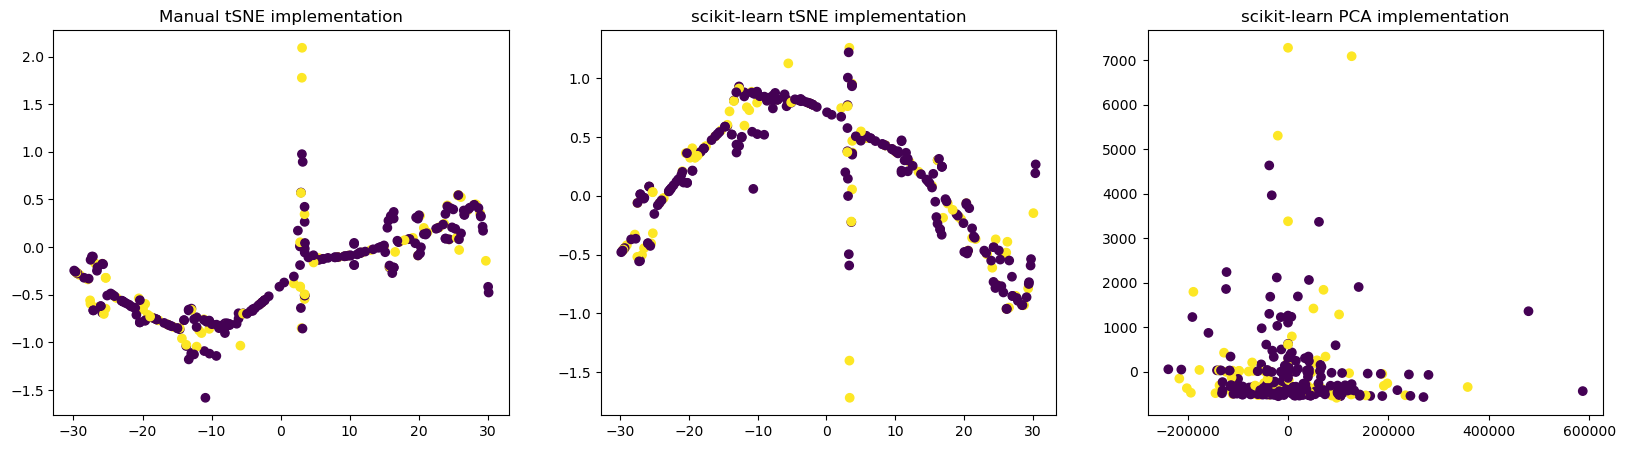

In [11]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(20, 5)

# plot the manual tSNE
ax[0].scatter(reduced_manual[:,0], reduced_manual[:,1], c=data.T[7])
ax[0].set_title("Manual tSNE implementation")

# plot scikit-learn tSNE
ax[1].scatter(reduced_tSNE[:,0], reduced_tSNE[:,1], c=data.T[7])
ax[1].set_title("scikit-learn tSNE implementation")

ax[2].scatter(reduced_pca[:,0], reduced_pca[:,1], c=data.T[7])
ax[2].set_title("scikit-learn PCA implementation")

plt.show()

Based on the plotted output, it is fairly easy to notice how the optimziation of both tSNE implementations are much more structured compared to the PCA. This is due to the conserved linearity that PCA provides, whereas tSNE instead conserves local differences, foregoing global linearities. Additionally, in both tSNE implementations, I notice that there is an arm that traverses the plot horizontally, and a second arm which traverses the plot vertically. This suggests that there is some local variation in these two directions, demonstrating that the points on the ends of the vertical arms are likely far from each other in mutlidimensional space and far form those points along the horizontal arms. 

My code is in great need for optimization. One key thing I noticed while running my algorithm vs scikit-learn's was that my algorithm took several minutes to run, whereas scikit-learn's tSNE implementation ran in a couple of seconds. While the outputted results are similar, it is fairly obvious that my code could use some optimization as well as parameter tuning to converge faster. For now, however, I was able to create my own implementation for tSNE and use it to analyze a dataset, creating a similar plot to that created by the industry standard, scikit-learn. I was able to not only clarify the different concepts, but also solidify how what is performed during tSNE, a process I use on a regular basis. For now, I will stick with scikit-learn's implementation when I perform tSNE at work :).

## Conclusion
Altogether, PCA and tSNE are both commonly used dimensionality reduction techniques in ML and data analysis. Here are some key differences between the two:
1. Linear vs non-linear: PCA is a linear technique that uses matrix factorization to reduce the dimensionality of the data. tSNE, on the other hand, is a non-linear technique that maps high-dimensional data into a lower-dimensional space by preserving pairwise distances between points.
2. Preserving distances: PCA aims to preserve as much variance in the data as possible, which means it tries to maintain the relationships between the data points that have the largest differences. In contrast, tSNE preserves pairwise distances between data points in the high-dimensional space and tries to represent these distances as closely as possible in the lower-dimensional space.
3. Interpretability: PCA can be easier to interpret than tSNE because the principal components generated by PCA have a clear meaning as linear combinations of the original variables. tSNE, on the other hand, produces a new, non-linear space where it can be harder to make sense of the relationships between variables.
4. Computational complexity: PCA is generally faster and less computationally intensive than t-SNE, making it more suitable for large datasets. tSNE requires computing pairwise distances between all data points, which can be time-consuming for datasets with many data points.
5. Application: PCA is often used for feature extraction or dimensionality reduction in machine learning algorithms, while tSNE is often used for data visualization and exploratory data analysis. tSNE is particularly useful for visualizing high-dimensional data in a way that can reveal underlying patterns or clusters in the data.

In summary, PCA and tSNE are both powerful tools for dimensionality reduction, but they differ in their assumptions, goals, and applications. The choice between the two depends on the specific needs and goals of the analysis.